In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

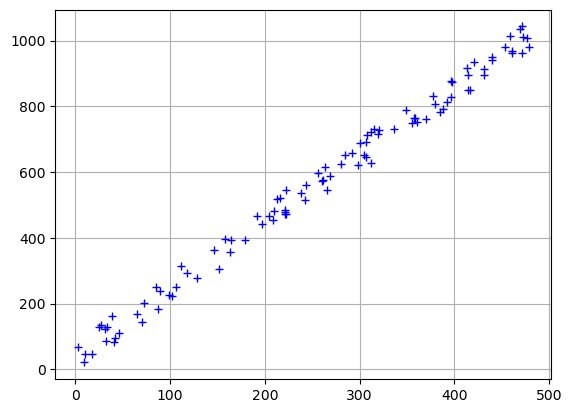

In [4]:
#PCA is a complexity reduction technique that tries to reduce a set of variables down 
#to a smaller set of components that represent most of the information in the variables.
#PCA works by identifying sets of variables that share variance, and creating 
#a component to represent that variance.

#Creating sample data
x_data = tf.multiply(5,tf.random.uniform(shape=[100],minval=0,maxval=100,dtype=tf.float32,seed=0))
y_data = tf.multiply(2,x_data)+1+tf.random.uniform(shape=[100],minval=0,maxval=100,dtype=tf.float32,seed=0)

X= tf.stack([x_data,y_data],axis=1)

plt.rc_context({'axes.edgecolor':'orange','xtick.color':'red','ytick.color':'red'})
plt.plot(X[:,0],X[:,1],'+',color='blue')
plt.grid()

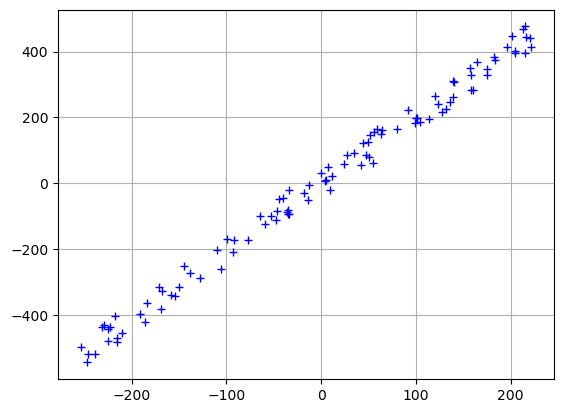

In [5]:
#standardizing the data
def normalize(data):
    X= tf.identity(data)
    X -=tf.reduce_mean(data,axis=0)
    return X

normalized_data = normalize(X)
plt.plot(normalized_data[:,0],normalized_data[:,1],'+',color='b')
plt.grid()

In [6]:
# understanding of are eigenvalues and eigenvectors?
eigen_values,eigen_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(normalized_data) ,normalized_data,axes=1))

print(eigen_values)
print(eigen_vectors)
#the eignvectors(principal component) determine the directions of the new feature space, and the eignvalues determine their magnitude

tf.Tensor([   15002.775 10542667.   ], shape=(2,), dtype=float32)
tf.Tensor(
[[-0.89934295 -0.43724394]
 [ 0.43724394 -0.89934295]], shape=(2, 2), dtype=float32)


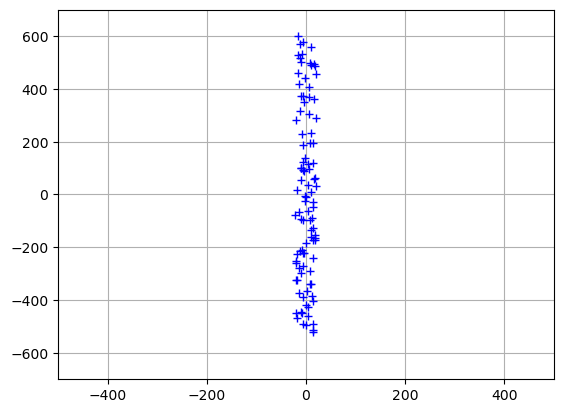

In [7]:
X_new = tf.tensordot(tf.transpose(eigen_vectors),tf.transpose(normalized_data),axes=1)
plt.plot(X_new[0,:],X_new[1,:],'+',color='b')
plt.xlim(-500,500)
plt.ylim(-700,700)
plt.grid()